In [35]:
import pandas as pd
server = '.\SQLEXPRESS'
database = 'heart2020'
from sqlalchemy.engine import URL
from sqlalchemy import create_engine

connection_string = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';Trusted_Connection=yes;'

connection_url = URL.create("mssql+pyodbc", query={"odbc_connect": connection_string})

engine = create_engine(connection_url)

cnx = engine.connect()


In [36]:
df = pd.read_sql("SELECT * FROM heart2020.dbo.heart_2020", engine)
df.head()



,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,28.9,No,No,No,0.0,0.0,No,Female,70-74,White,No,Yes,Very good,7.0,No,No,No
1,Yes,29.16,Yes,No,Yes,0.0,0.0,No,Male,70-74,White,Yes,Yes,Fair,8.0,No,No,No
2,No,23.57,Yes,No,No,0.0,2.0,No,Male,70-74,White,No,Yes,Very good,8.0,No,No,Yes
3,No,29.23,Yes,Yes,No,0.0,3.0,No,Female,40-44,White,No,No,Good,9.0,No,No,No
4,No,27.37,No,No,No,0.0,0.0,No,Female,45-49,White,No,Yes,Excellent,6.0,No,No,No


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   HeartDisease      319795 non-null  object
 1   BMI               319795 non-null  object
 2   Smoking           319795 non-null  object
 3   AlcoholDrinking   319795 non-null  object
 4   Stroke            319795 non-null  object
 5   PhysicalHealth    319795 non-null  object
 6   MentalHealth      319795 non-null  object
 7   DiffWalking       319795 non-null  object
 8   Sex               319795 non-null  object
 9   AgeCategory       319795 non-null  object
 10  Race              319795 non-null  object
 11  Diabetic          319795 non-null  object
 12  PhysicalActivity  319795 non-null  object
 13  GenHealth         319795 non-null  object
 14  SleepTime         319795 non-null  object
 15  Asthma            319795 non-null  object
 16  KidneyDisease     319795 non-null  obj

In [38]:
df['Sex'].value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

In [39]:
df.groupby('Sex')['Smoking'].value_counts()

Sex     Smoking
Female  No         105276
        Yes         62529
Male    No          82611
        Yes         69379
Name: Smoking, dtype: int64

In [40]:
df.AgeCategory.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [41]:
df.groupby('Sex')['AgeCategory'].value_counts()

Sex     AgeCategory
Female  65-69          18048
        60-64          17572
        70-74          17089
        55-59          15487
        80 or older    14716
        50-54          13335
        75-79          12190
        45-49          11438
        40-44          10952
        35-39          10458
        18-24           9434
        30-34           9130
        25-29           7956
Male    60-64          16114
        65-69          16103
        55-59          14270
        70-74          13976
        50-54          12047
        18-24          11630
        45-49          10353
        35-39          10092
        40-44          10054
        30-34           9623
        80 or older     9437
        75-79           9292
        25-29           8999
Name: AgeCategory, dtype: int64

In [42]:
df.Smoking.value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

In [43]:
df.SleepTime.value_counts()

7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
23.0        3
19.0        3
21.0        2
Name: SleepTime, dtype: int64

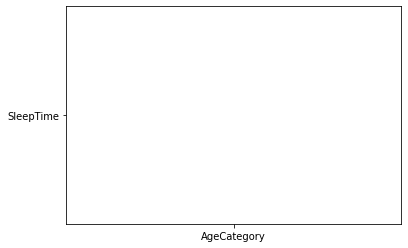

In [48]:
import matplotlib.pyplot as plt
